In [26]:
import numpy as np
import spiceypy as spice
import math
import matplotlib.pyplot as plt
from scipy import constants
from scipy import optimize
from astropy import modeling
from mpmath import *
import csv
import pandas as pd

In [27]:
a = np.random.rand(4,5)
numbers = range(4)
a

array([[0.69767595, 0.09385895, 0.33447352, 0.72062857, 0.97881644],
       [0.01337712, 0.1600895 , 0.88140676, 0.10372788, 0.68512785],
       [0.05351177, 0.24867765, 0.11764696, 0.30173178, 0.21662026],
       [0.45600208, 0.12081527, 0.29668752, 0.60703453, 0.6038777 ]])

In [28]:
raypositions = pd.DataFrame(a, index = numbers, columns=['Positionsone','Positionstwo','Positionsthree','Positionsfour','Positionsfive',])
raypositions

,Positionsone,Positionstwo,Positionsthree,Positionsfour,Positionsfive
0,0.697676,0.093859,0.334474,0.720629,0.978816
1,0.013377,0.160090,0.881407,0.103728,0.685128
2,0.053512,0.248678,0.117647,0.301732,0.216620
3,0.456002,0.120815,0.296688,0.607035,0.603878


In [34]:
#now test how to select things
myselection = raypositions.iloc[1,1]
myselection

0.16008950212784434

In [35]:
#now convert this back into an array
b = raypositions.iloc[:,2].values #this has a +1 on the indices
b

array([0.33447352, 0.88140676, 0.11764696, 0.29668752])

In [37]:
raypositions.iloc[1,0] = 5
raypositions

,Positionsone,Positionstwo,Positionsthree,Positionsfour,Positionsfive
0,0.697676,0.093859,0.334474,0.720629,0.978816
1,5.000000,0.160090,5.000000,0.103728,0.685128
2,0.053512,0.248678,0.117647,0.301732,0.216620
3,0.456002,0.120815,0.296688,0.607035,0.603878


In [70]:
Slist.reverse()


In [92]:
#convert to a 1*200 vector (bottom to top)
S = np.asarray(Slist)
S = np.concatenate(S) 
S[2].dtype

dtype('<U24')

In [105]:
#vector S needs some conditioning to work
a = np.zeros(300) ; b = np.zeros(300)
for i in range(300):
    a[i] = float(S[i])
print(a[1])

a[1].dtype
#b.dtype




8262.931208019696


dtype('float64')

In [106]:
minS = np.amin(a[1])
print(minS)


8262.931208019696


In [107]:
a = a-minS
maxidx = np.argmax(a)
a[maxidx] = a[maxidx-1]

In [114]:
#removing the step function
for i in range(300):
    b[i] = a[i] % 1 
b[0:5] = 0

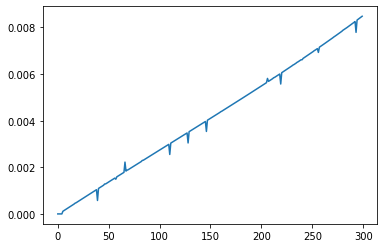

In [115]:
plt.plot(b)

In [2]:
t=0
for i in range(50):
    +=t
print(t)

SyntaxError: invalid syntax (<ipython-input-2-6e9820624e36>, line 3)

In [18]:
#practice with high precsion trig
mp.dps = 40
mp.pretty = True
a = mp.sin(0.00000000000000000019876340123)
print(a)

1.987634012300000011828105615203991324156e-19


In [2]:
dist = 300000
alt = range(1000, dist, 1000)
altsize = len(alt)
sza = 0.45
Ne = np.empty([1,altsize])
ionoresidual = np.empty([1,altsize])
H = 13000 #scale height for ionosphere
k = 0.57 #magic number
h = 125000 # Peak N's altitude
N0 = 2e11 #Peak electron density

200000000000.0


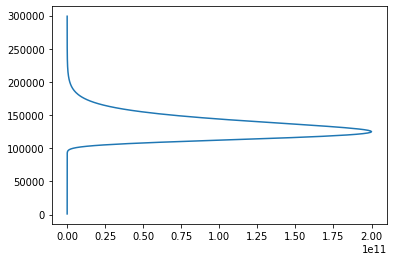

In [3]:
    sza = 0
    for i in range(altsize):
        #densityadjustment = N0 * (np.cos(sza[i]) ** k ) # SZA adjustment
        NHP = (alt[i] - h) / H #Normalised Height Parameter
        if i==10000:
            print('stop here')
        thing =(1/ np.cos(sza)) * np.exp(-NHP)
        exponetial = 1 - NHP - (thing)
        Ne[0,i] = N0 * np.exp( exponetial) # convert cm3 to m3
        ionoresidual[0,i] = (-40.31) * (Ne[0,i] / (437.1e6 ** 2)) #convert electron density to refractive index {-k * Ne/f^2}

    a= np.amax(Ne)
    print(a)
    plt.plot(Ne[0,:], alt)

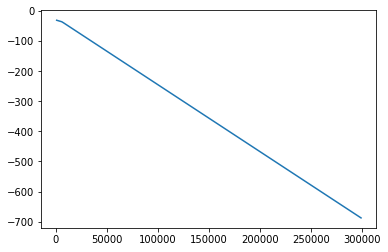

In [9]:

    Nn = np.ones([1,altsize])
    N = np.ones([1,altsize])
    temp = np.ones([1,altsize])
    nuetralresidual =np.empty([1,altsize])
    #Martian height and pressure have different models depending on alt
    for i in range(altsize):
        if alt[i] >= 7000:
            temp[0,i] = -23.4 - (0.00222 * alt[i])
        else:
            temp[0,i] = -31 -(9.98e-4 * alt[i])# this discontinuity shall be neglected in the curve matching stage add curve fitting to this stage

        pres = 699 * np.exp(-9e-5 * alt[i])
        density = pres / (0.1921 *(temp[0,i] +273.1))
        Nn[0,i] = pres/(constants.Boltzmann * (temp[0,i] +273.1))
        
        nuetralresidual[0,i] = Nn[0,i] * 1.804e-29


plt.plot(alt, temp[0,:])

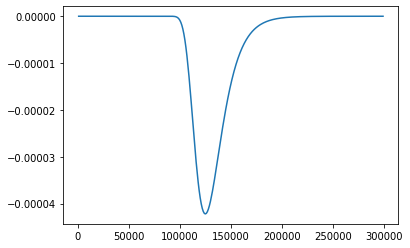

In [5]:
totalresidual =  (ionoresidual + nuetralresidual)
plt.plot(alt, totalresidual[0,:])

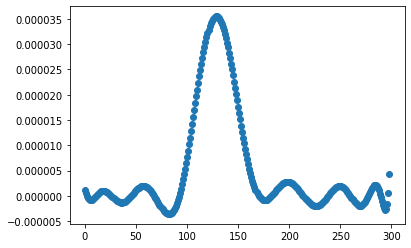

In [6]:
# practice with curve fitting
ynew = np.ones([1,altsize])
x = alt
y = -totalresidual[0,:]
a = np.polyfit(x,y,15)
for i in range(altsize):
    ynew[0,i] = np.polyval(a,x[i])

plt.plot( ynew[0,:], 'o')

Max Y is  -0.0004 
mean is  0.6607989246724559 
standard deviation is  5156.977482893411


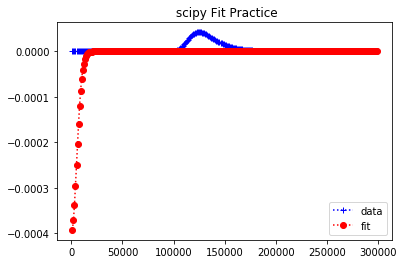

In [7]:
# another option is to use gaussian
def test(x,a, x0,sigma):
    return a* np.exp(-(x-x0)**2/(2*sigma**2))

# maybe this gets confused because it is upside down, cant sqr a neg?


n = len(x)                          #the number of data
mean = sum(x * y) / n
sigma = np.sqrt(sum(y*(x - mean)**2))        #note this correction

param, covariance = optimize.curve_fit(test ,x, y,p0=[5,mean,sigma])
param[0] = -0.0004
maxy = param[0]
mean = param[1]
std = param[2]
print('Max Y is ', maxy, '\nmean is ', mean, '\nstandard deviation is ', std)


#ans = np.random.normal(param[0], param[0], x)



plt.plot(x,y,'b+:',label='data')
plt.plot(x,test(x,*param),'ro:',label='fit')
plt.legend()
plt.title(' scipy Fit Practice')

plt.show()

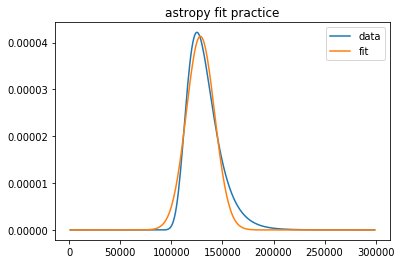

In [8]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=0.00004, mean=130000, stddev=5000)
fitted_model = fitter(model, x, y)
plt.plot(x, y, label = 'data')
plt.plot(x, fitted_model(x), label = 'fit')
plt.legend()
plt.title('astropy fit practice')
plt.show()